# Import Libraries

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# To create linear regression model
from sklearn.linear_model import LinearRegression

# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [115]:
# Read the used_cars_data.csv files and load into data frame
UsedCars_df = pd.read_csv("used_cars_data.csv")  


# 1. Define the problem and perform an Exploratory Data Analysis

## 1.1 Problem statement:

In Today's Indian Automobile Industry, there is a huge demand for used cars compared to new cars. 
The Cars4U is a new tech start-up that aims to find detailed analysis in this market.
So, we are going to predict the price of the used cars by building the linear regression model 
based on the data provided. 

We are provided with below features for the used cars for our analysis, 
- Name of the Car with Brand and model name, Car location, manufacture year, distance driven,Fuel type,Transmission type,
Ownership(i.e First or second,etc..), Mileage, Engine power, Number of seats, Car price for new and used cars.





## 1.2 Observations on Data

In [116]:
#Shape of the data (rows and columns)
UsedCars_df.shape

(7253, 14)

There are 7253 rows and 14 columns

In [117]:
#To view dataframe details
UsedCars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


- There are 14 columns with datatypes integer, float and objects. 
- There are some missing values for Mileage,Engine,Power,Seats,New_Price,Price features.

In [118]:
UsedCars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.000,3626.000,2093.905,0.000,1813.000,3626.000,5439.000,7252.000
Year,7253.000,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Seats,7200.000,5.280,0.812,0.000,5.000,5.000,5.000,10.000
Price,6019.000,9.479,11.188,0.440,3.500,5.640,9.950,160.000


- The data is for cars manufactured between 1996 and 2019 (inclusive)
- The cars driven minimum kilometers 171 and to maximum of 6500000. The max km looks like an outlier since it's value very far from its mean value 58699 km.
- The min seats is zero and max seats in car is 10.
- The minimum Price of used car is 44000 INR and maximum is 160 Lakhs INR.

In [119]:
UsedCars_df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [120]:
UsedCars_df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000,NaN,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000,NaN,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000,8.61 Lakh,4.500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.000,NaN,6.000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.000,NaN,17.740


In [121]:
UsedCars_df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

## Observations on Data:

1. There are 7253 rows and 14 columns in the dataframe.
2. There are 3 datatypes for the fields - 2 floats, 3 integers, 9 Objects
3. There are missing values for fields - 
Mileage,Engine,Power,Seats,New_Price,Price   
4. From the statistical summary, 
The data is for the car manufactured from year 1996 to 2019 for kilometers driven between 171 and 6500000 km ,
The maxmimum seats in car is 10 but the minimum seats is 0 ,
The price of the cars ranges from Rs 44,000 to Rs 1,60,00,000
5. The dependant variable is price.
   

# 1.3 Univariate analysis 

Before we process data, lets take the graphical visualization of the data to understand better.

In [122]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

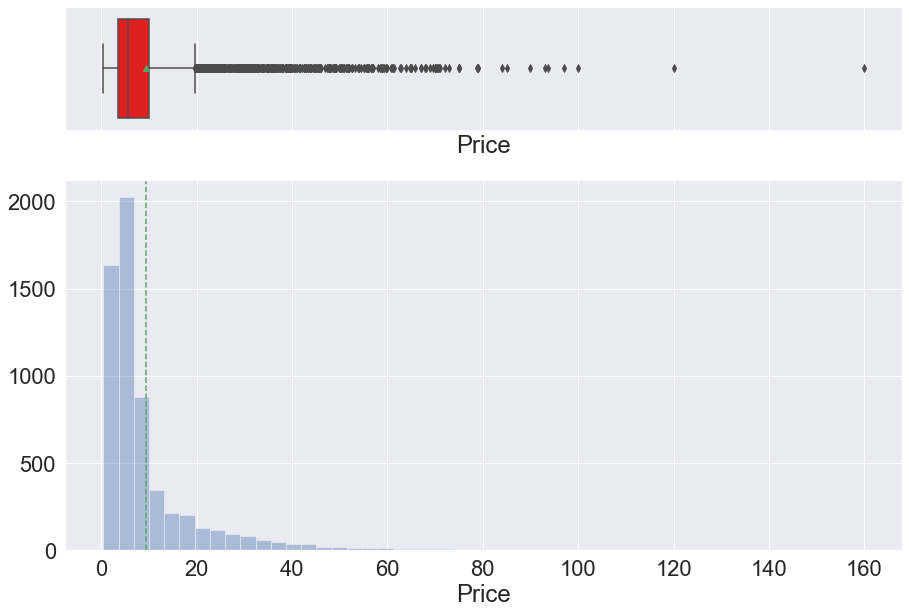

In [123]:
histogram_boxplot(UsedCars_df.Price)

**Observation**

- The Price is Right skewed which means some Cars have Price above 40 Lakhs
- Mean Price of Car is around 10 Lakhs
- There are outliers exists.

## To remove the units in Engine, Power,Mileage and New price feature.
To convert the features - Engine, Power,Mileage, New price objects datatype to float.


In [124]:
UsedCars_df_A = UsedCars_df

In [125]:
#To change Power with units 'null bhp' with nan
UsedCars_df_A['Power'] = UsedCars_df_A['Power'].replace('null bhp', np.nan)

In [126]:
def Engine_to_num(Engine):
    """In the Engine column I'm replacing the terminal 'CC' with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(Engine, str):
        return float(Engine.replace('CC', ''))
    else: 
        return np.nan
    
def Power_to_num(Power):
    """In the Power column I'm replacing the terminal 'bhp' with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(Power, str):
        return float(Power.replace('bhp', ''))
    else: 
        return np.nan

def Mileage_to_num(Mileage):
    """In the Mileage column I'm replacing the terminal 'km/kg' and 'kmpl'  with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(Mileage, str):
        return float(Mileage.replace('km/kg', '').replace('kmpl', ''))
    else: 
        return np.nan
    
def New_Price_to_num(New_Price):
    """In the New_Price column I'm replacing the terminal 'Cr' and 'Lakh'with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(New_Price, str):
        multiplier = 1
        if New_Price.endswith('Cr'):
            multiplier = 100
        elif New_Price.endswith('Lakh'):
            multiplier = 1
        return float(New_Price.replace('Cr', '').replace('Lakh', '')) * multiplier
    else: 
        return np.nan
    
col_transforms = {
       'Mileage' : Mileage_to_num
      ,'Engine': Engine_to_num
      ,'Power' : Power_to_num
      ,'New_Price' : New_Price_to_num
} 

# k is the key, so the column name here
# v is the value, which a function in this case and is
#     either `height_to_num` or `weight_to_num`
for k,v in col_transforms.items():
    UsedCars_df_A[k] = UsedCars_df_A[k].map(v)


In [127]:
UsedCars_df_A

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,nan,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,nan,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.610,4.500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,nan,6.000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,nan,17.740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.540,1598.000,103.600,5.000,nan,nan
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.210,1197.000,103.600,5.000,nan,nan
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.080,1461.000,63.100,5.000,nan,nan
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.200,1197.000,103.600,5.000,nan,nan


## Distribution of each numerical variable.

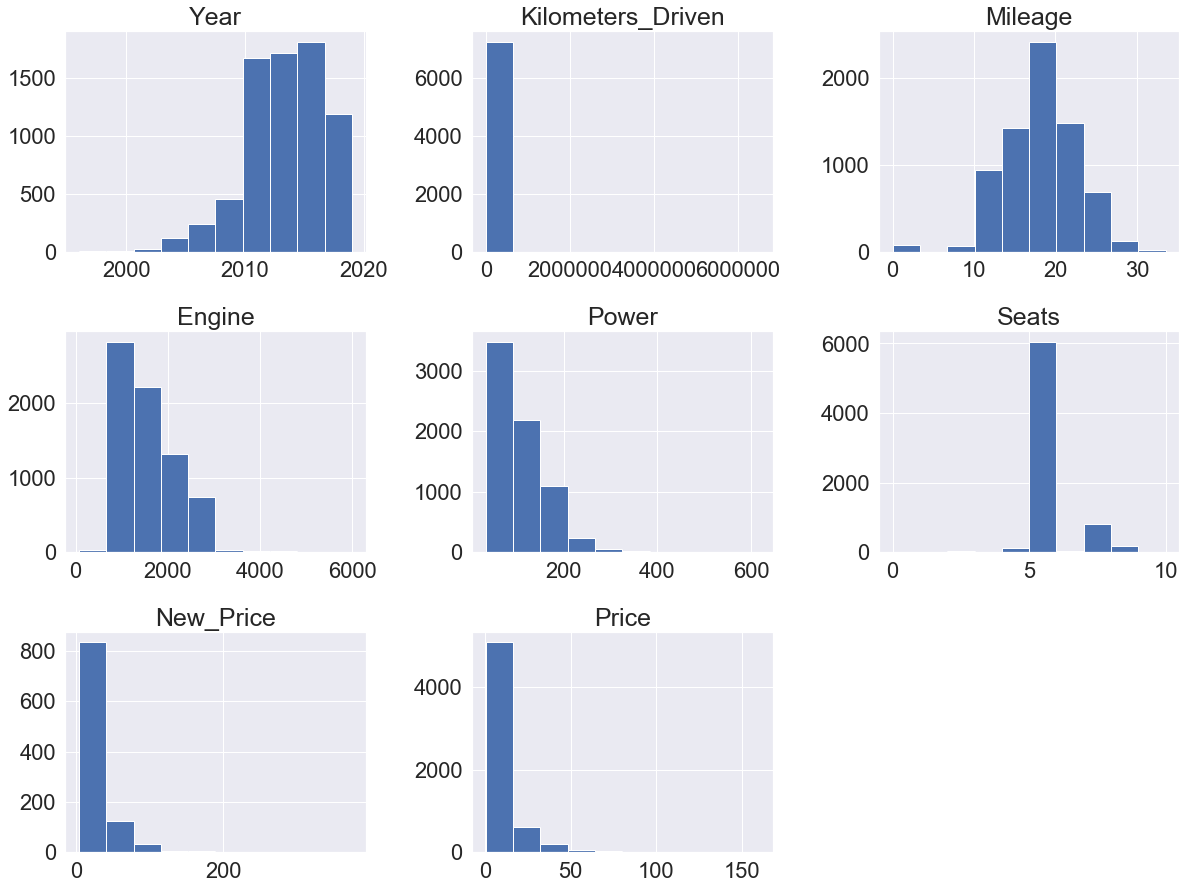

In [128]:
#To set options to display float values
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits

# lets plot histogram of all plots
from scipy.stats import norm
all_col = UsedCars_df_A.select_dtypes(include=np.number).columns.tolist()
all_col.remove('S.No.')
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(UsedCars_df_A[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

**Observation**

- The manufacturing year is left skewed. The average number of cars manufactured in year 2013. 
  There are less cars manufactured which introduces left tail therefore distribution becomes left skewed
- The average seats is 5 but there are some cars with seats more than 8.
- The kilometers driven is right skewed. The average kilometers driven is around 58000 but there are some cars driven to maximum 6500000
- The Mileage data has been somewhat normal distribution.
- The Engine, power, New price and price looks right Skewed. 

In [129]:
UsedCars_df_A.mean()

S.No.                3626.000
Year                 2013.365
Kilometers_Driven   58699.063
Mileage                18.142
Engine               1616.573
Power                 112.765
Seats                   5.280
New_Price              22.780
Price                   9.479
dtype: float64

In [130]:
UsedCars_df.max()

S.No.                                       7252
Name                 Volvo XC90 2007-2015 D5 AWD
Location                                    Pune
Year                                        2019
Kilometers_Driven                        6500000
Fuel_Type                                 Petrol
Transmission                              Manual
Owner_Type                                 Third
Mileage                                   33.540
Engine                                  5998.000
Power                                    616.000
Seats                                     10.000
New_Price                                375.000
Price                                    160.000
dtype: object

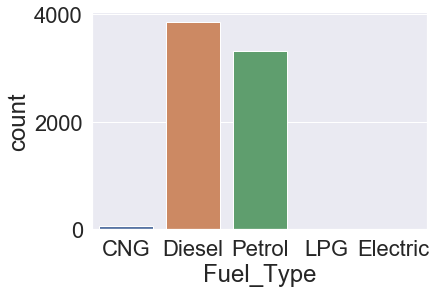

In [131]:
sns.countplot(x='Fuel_Type', data=UsedCars_df_A);

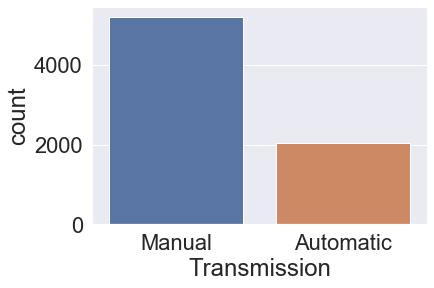

In [132]:
sns.countplot(x='Transmission', data=UsedCars_df_A);

In [133]:
UsedCars_df_A.Transmission.value_counts()

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

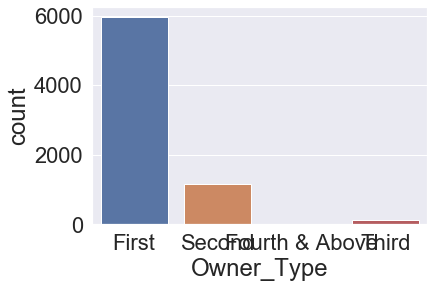

In [134]:
sns.countplot(x='Owner_Type', data=UsedCars_df_A);

In [135]:
UsedCars_df_A.Location.value_counts(ascending=False)

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

**Observation**

- Fuel type: The Diesel cars are the maximum followed by petrol cars. 
- Transmission: The manual cars are maximum followed by automatic cars. There are approximately 5000 manual cars and 2000 automatic cars
- Owner Type: First owner is maximum which is close to 6000 cars. The least is fourth and above owners.
- Mileage: The mileage has different units like kmpl,km/kg. 
- location: Mumbai has the maximum number of cars available for sale and lowest is Ahmedabad.


# 1.4 Bivariate analysis 

Before we process data, lets take the graphical visualization of the data to understand better.

In [136]:
UsedCars_df_A

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,nan,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,nan,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.610,4.500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,nan,6.000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,nan,17.740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.540,1598.000,103.600,5.000,nan,nan
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.210,1197.000,103.600,5.000,nan,nan
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.080,1461.000,63.100,5.000,nan,nan
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.200,1197.000,103.600,5.000,nan,nan


In [138]:
UsedCars_df_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


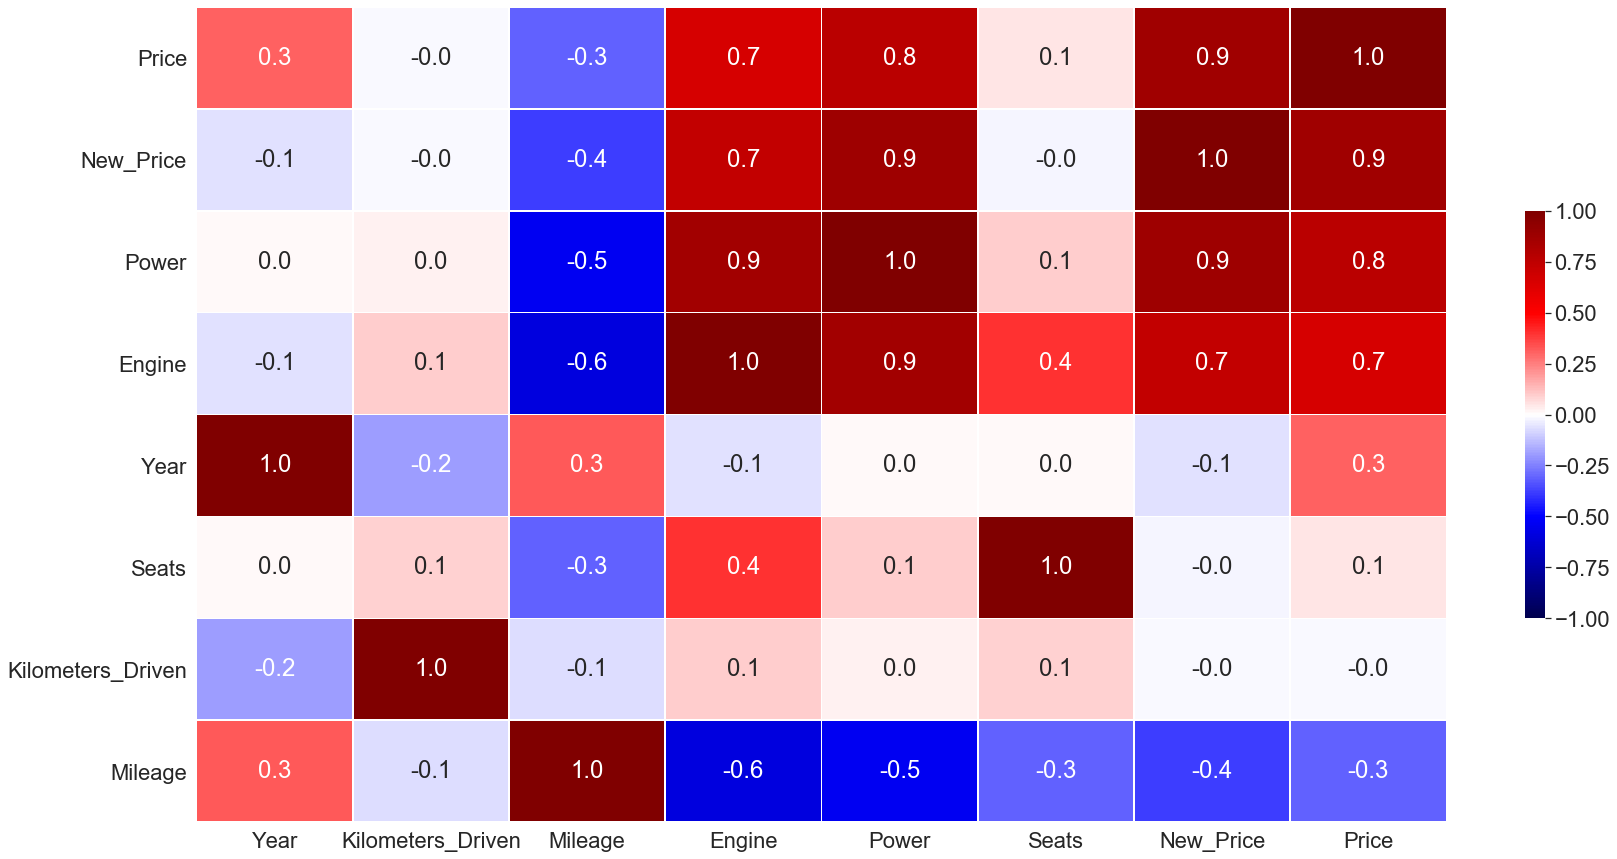

In [139]:
numeric_columns = UsedCars_df_A.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('S.No.') # dropping year column as it is temporal variable
corr = UsedCars_df_A[numeric_columns].corr().sort_values(by=['Price'],ascending=False) # sorting correlations w.r.t life expectancy  


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

**Observations**

Based on Heatmap, 
- Price is highly Postively correlated with Engine, Power, New price, which means Price of used car increases as the 
  Engine in CC, Power in bhp and price of new car increases. 
- Price is less positively correlated with Year of manufacture.
- Price is very less negatively correlated with mileage 

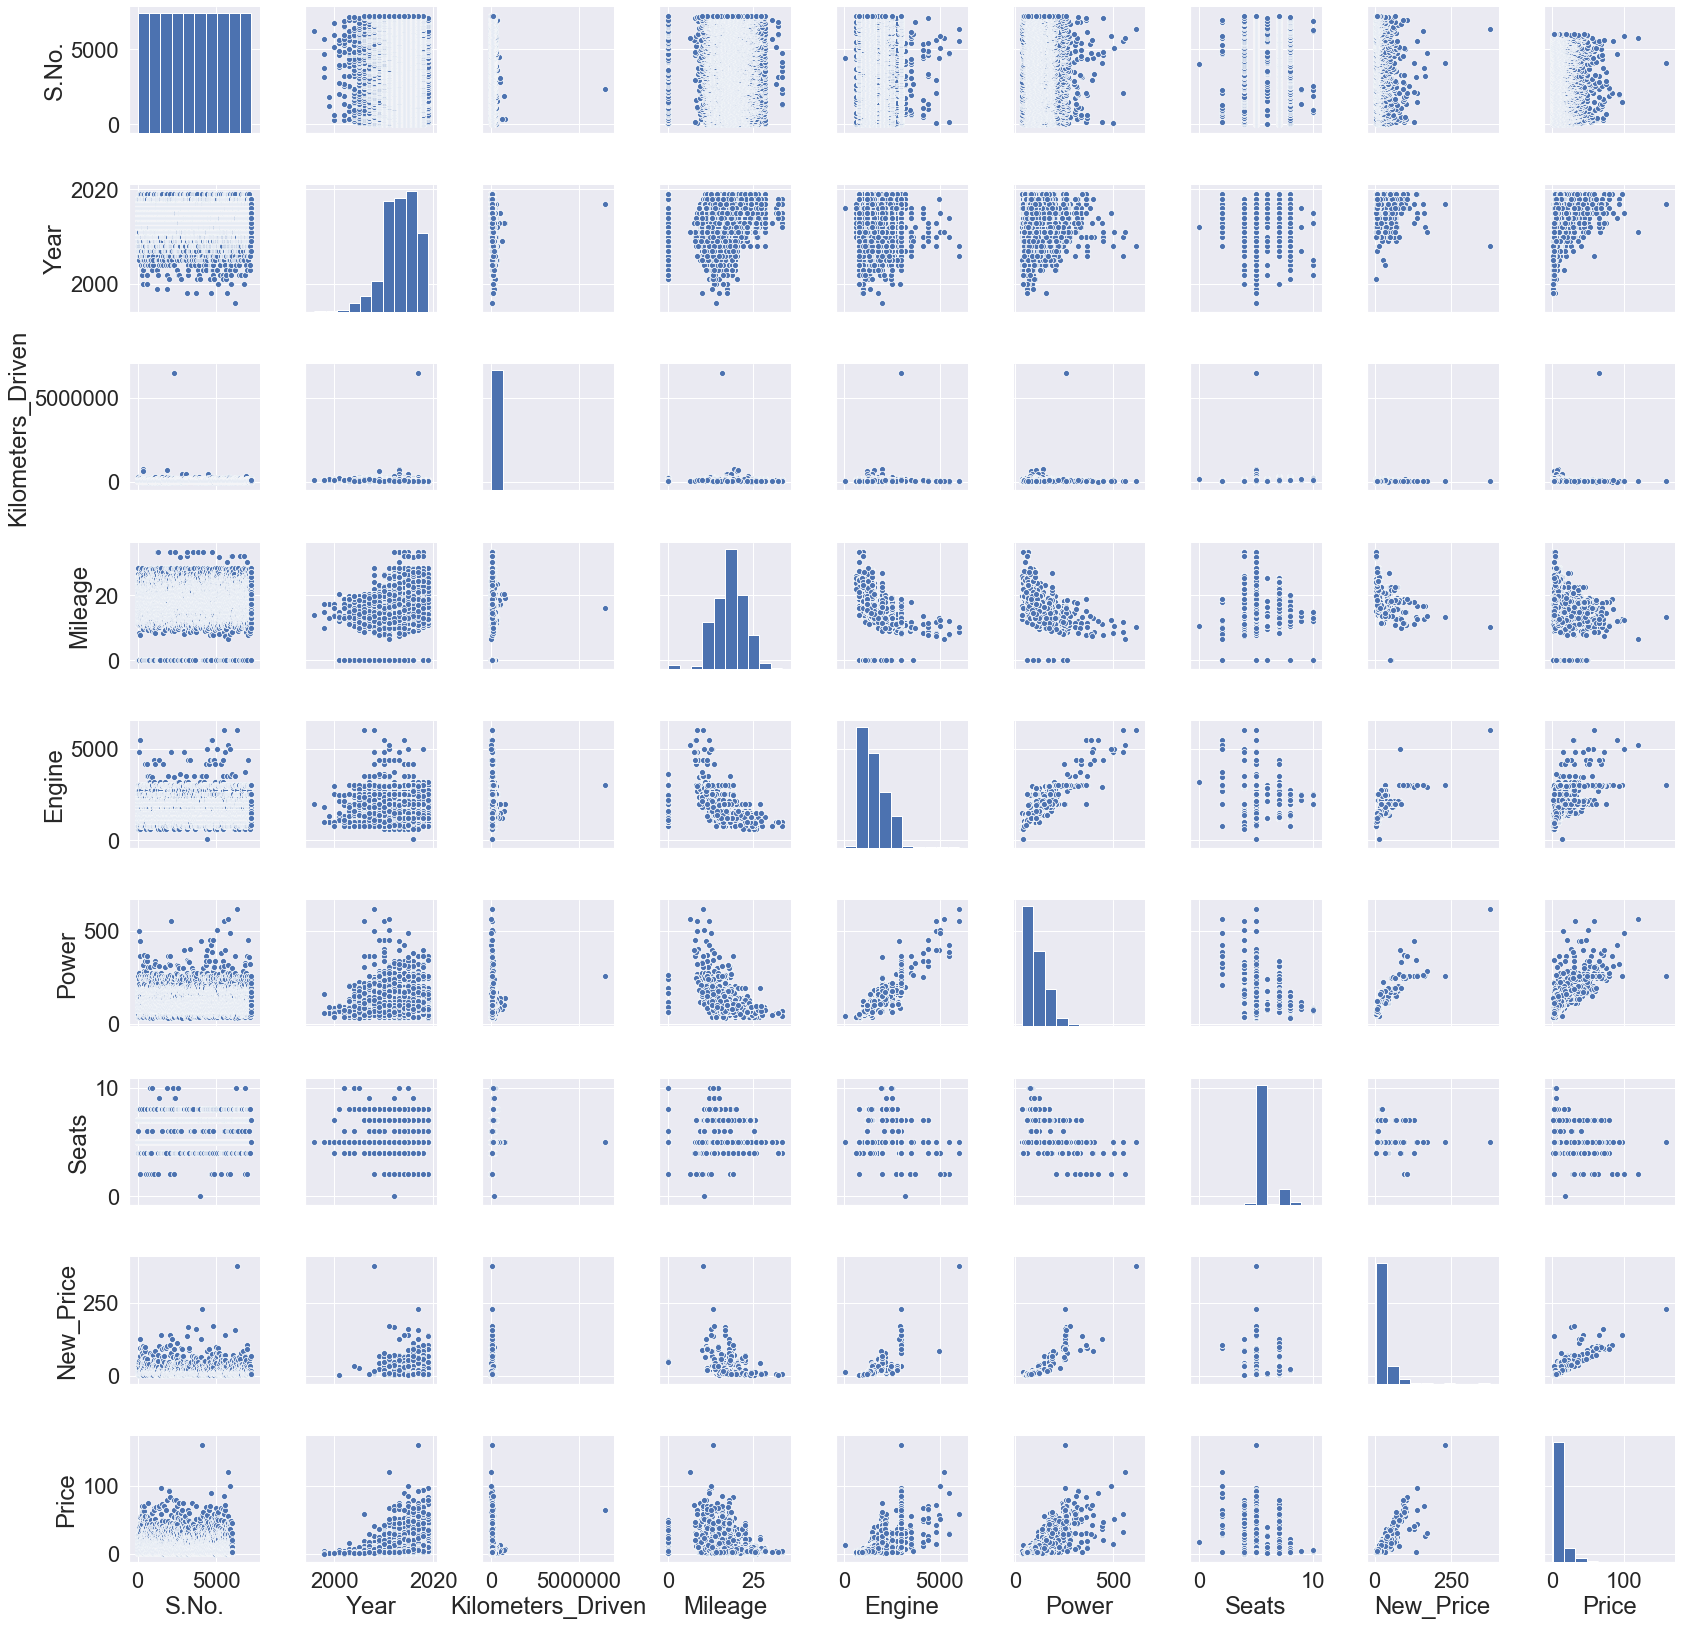

In [140]:
sns.pairplot(UsedCars_df_A);

**Observations**

Based on Pairplot, 
- As New price of car increases the price of its used car increases.
- As Power bhp increases the the price of its used car increases.
- As year becomes latest the price of used car also somewhat increases.
- As Power bhp and engine CC increases, the mileage somewhat decreases in used and new car.
- As Engine CC increased, the power increases in the used and new car.


In [141]:
UsedCars_df_A

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,nan,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,nan,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.610,4.500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,nan,6.000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,nan,17.740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.540,1598.000,103.600,5.000,nan,nan
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.210,1197.000,103.600,5.000,nan,nan
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.080,1461.000,63.100,5.000,nan,nan
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.200,1197.000,103.600,5.000,nan,nan


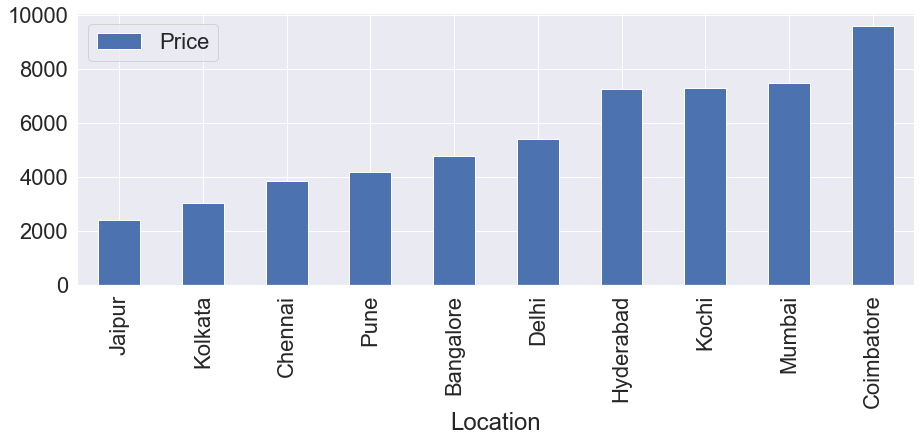

In [142]:
UsedCars_df_A.groupby(by=['Location'])['Price'].sum().reset_index().sort_values(['Price']).tail(10).plot(x='Location',
                                                                                                           y='Price',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

The total Price of used cars is maximum in location Coimbatore and minimum in Jaipur

# 2. Illustrate the insights based on EDA

## 2.1 Comments on the attributes

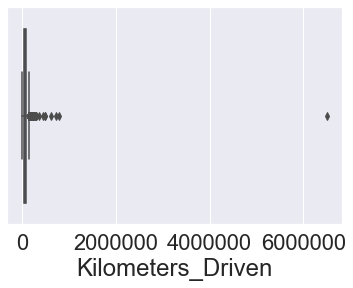

In [143]:
sns.boxplot(x=UsedCars_df_A['Kilometers_Driven']) 

Kilometers_Driven : 
The mean kilometer driven is 58699. Above plot shows a point in 6500000 which is not included in the box of other observation 
There are some more points after Q4 Quaratile and they are also outliers.

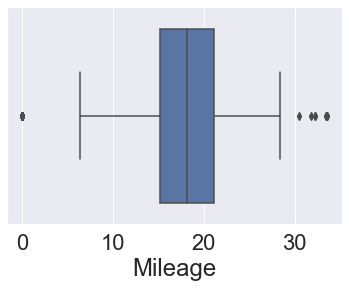

In [144]:
sns.boxplot(x=UsedCars_df_A['Mileage']) 

Mileage : Above plot shows a point before (Q1-1.5 * IQR) and 4 points after (Q3+1.5 IQR). All these points are oultiers.

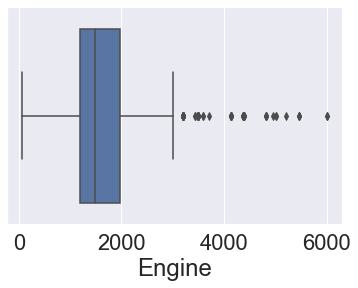

In [145]:
sns.boxplot(x=UsedCars_df_A['Engine']) 

Engine:
There are 13 points greater than 3000 (Q3+1.5 IQR), which is an outlier.


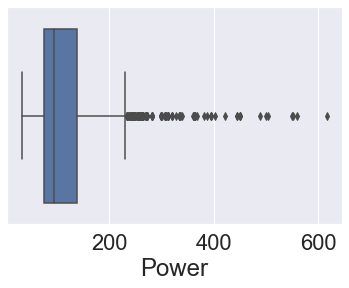

In [146]:
sns.boxplot(x=UsedCars_df_A['Power']) 

Power:
There are many points greater than 240 (Q3+1.5 IQR), which is an outlier.


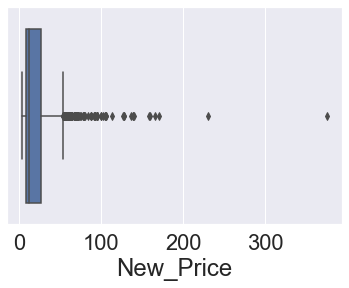

In [147]:
sns.boxplot(x=UsedCars_df_A['New_Price']) 

New Price:
There are many points greater than (Q3+1.5 IQR), which is an outlier.


## Lets look at outliers in every numerical column

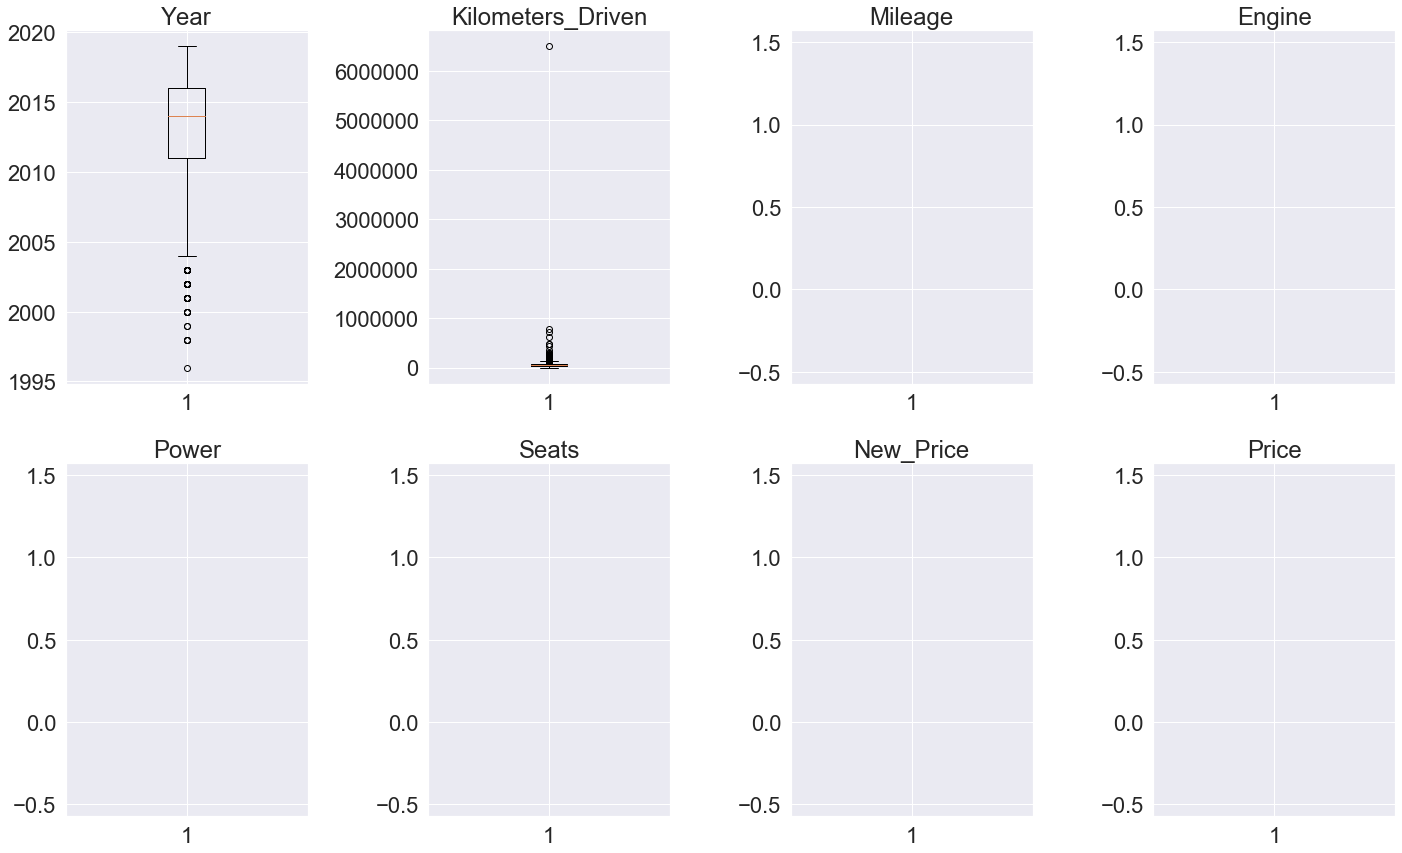

In [148]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(UsedCars_df_A[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

- There are some lower outliers in years.
- There are some upper outliers in Kilometers driven. 
- We will treat these outliers as these might adversely affect the predictive power of linear model however in real life these outliers may be due to non-linear pattern in the data set or can be important information. There could be some missing values which needs to treated in below data processing.

## Comments on distribution of variables and fixes for better modeling

- The kilometer driven and Price are right skewed. They need to be fixed using some transformation to reduce the skewness. We will perform log transformation on the Kilometer driven and the Price in below data preprocessing.
- Need to handle the categorical features before we proceed for modeling.

# 3. Data Pre-processing

## 3.1 Identification of extreme values:

In [149]:
UsedCars_df_A.max()

S.No.                                       7252
Name                 Volvo XC90 2007-2015 D5 AWD
Location                                    Pune
Year                                        2019
Kilometers_Driven                        6500000
Fuel_Type                                 Petrol
Transmission                              Manual
Owner_Type                                 Third
Mileage                                   33.540
Engine                                  5998.000
Power                                    616.000
Seats                                     10.000
New_Price                                375.000
Price                                    160.000
dtype: object

Identification of extreme values:
- The Kilometers_Driven average value is around 58K but we have one entry with extreme value 6500000

## 3.2 To check for any missing values in the features.

In [150]:
#To check for any missing values 
(UsedCars_df_A['Kilometers_Driven'] == 0).any()

False

In [151]:
(UsedCars_df_A['Mileage'] == 0).any()

True

In [152]:
#To get count of mileages having zero mileage.
UsedCars_df_A['Mileage'].isin([0]).sum()

81

In [153]:
(UsedCars_df_A['Engine'] == 0).any()

False

In [154]:
(UsedCars_df_A['Power'] == 0).any()

False

In [155]:
(UsedCars_df_A['Price'] == 0).any()

False

In [156]:
(UsedCars_df_A['New_Price'] == 0).any()

False

Based on above checks for any zero values on features  - kilometer driven, Mileage, Engine, Power, Price and New Price
- Mileage has zero values.
- Mileage has 81 rows with value zero.

## 3.3 Transformation to reduce skewness

Log transformation :
The price and kilometer driven have skewness. so we will do a log transformation to reduce the skewness. 

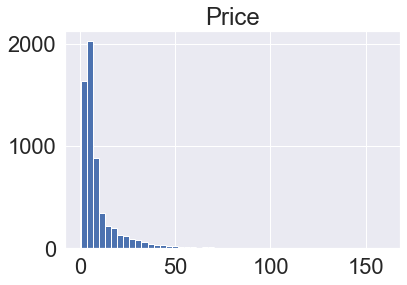

0


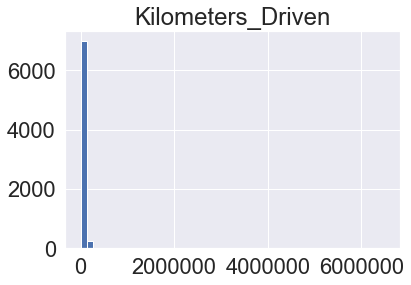

0


In [157]:
cols_to_log = ['Price', 'Kilometers_Driven']
for colname in cols_to_log:
    plt.hist(UsedCars_df_A[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(UsedCars_df_A[colname] <= 0))

In this cases, we have zero so we can't directly take the log of these numbers. We will try other options,
- One option is to just add some small positive value to every element of these columns so that the log is defined on every value in the column we're transforming
- Second option is to use np.arcsinh which is like the log for large values but handles negative and zero values as well.
- Third option to use a power like sqrt which is like a weaker log transform but it can handle zeros.

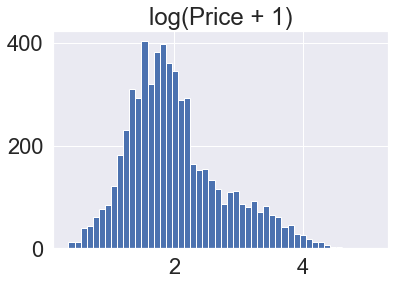

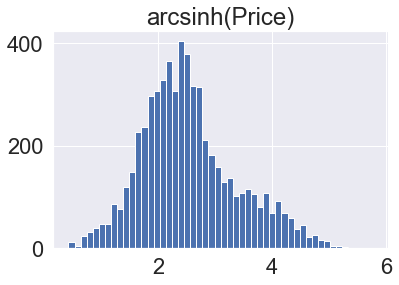

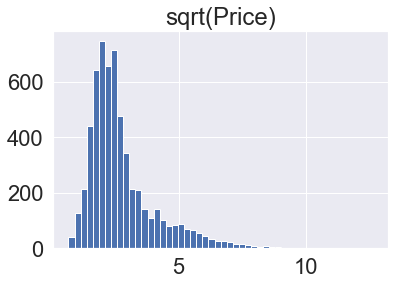

In [158]:
plt.hist(np.log(UsedCars_df_A['Price'] + 1), 50)
plt.title('log(Price + 1)')
plt.show()
plt.hist(np.arcsinh(UsedCars_df_A['Price']), 50)
plt.title('arcsinh(Price)')
plt.show()
plt.hist(np.sqrt(UsedCars_df_A['Price']), 50)
plt.title('sqrt(Price)')
plt.show()

Out of 3 options, All three options has helped but Sqrt is not strong enough. 
The log+1 and arcsinh looks similar and has distributed like normally. So,i prefer using the arcsinh.

In [159]:
for colname in cols_to_log:
    UsedCars_df_A[colname + '_arcsinh'] = np.arcsinh(UsedCars_df_A[colname])
UsedCars_df_A.drop(cols_to_log, axis=1, inplace=True)

In [160]:
UsedCars_df_A

,S.No.,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price_arcsinh,Kilometers_Driven_arcsinh
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,26.600,998.000,58.160,5.000,nan,1.326,11.878
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,19.670,1582.000,126.200,5.000,nan,3.220,11.314
2,2,Honda Jazz V,Chennai,2011,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.610,2.209,11.430
3,3,Maruti Ertiga VDI,Chennai,2012,Diesel,Manual,First,20.770,1248.000,88.760,7.000,nan,2.492,12.067
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,nan,3.570,11.306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,Diesel,Manual,First,20.540,1598.000,103.600,5.000,nan,nan,12.094
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,Petrol,Automatic,First,17.210,1197.000,103.600,5.000,nan,nan,11.678
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,Diesel,Manual,First,23.080,1461.000,63.100,5.000,nan,nan,10.933
7251,7251,Volkswagen Polo GT TSI,Pune,2013,Petrol,Automatic,Third,17.200,1197.000,103.600,5.000,nan,nan,11.557


## 3.4 Feature engineering - To get brand and model from overall name.

In [161]:
UsedCars_df_A['Name']

0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7248                    Volkswagen Vento Diesel Trendline
7249                               Volkswagen Polo GT TSI
7250                               Nissan Micra Diesel XV
7251                               Volkswagen Polo GT TSI
7252    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7253, dtype: object

In [162]:
# To get the Brand and Model name
workrt = UsedCars_df_A["Name"].str.split(" ", n = 1, expand = True) 
workrt.head()

,0,1
0,Maruti,Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option
2,Honda,Jazz V
3,Maruti,Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic


In [163]:
#To add the Brand and Model name columns from the splited records
UsedCars_df_A["Brand"]= workrt[0]   
UsedCars_df_A["Model"]= workrt[1]

In [164]:
UsedCars_df_A

,S.No.,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price_arcsinh,Kilometers_Driven_arcsinh,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,26.600,998.000,58.160,5.000,nan,1.326,11.878,Maruti,Wagon R LXI CNG
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,19.670,1582.000,126.200,5.000,nan,3.220,11.314,Hyundai,Creta 1.6 CRDi SX Option
2,2,Honda Jazz V,Chennai,2011,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.610,2.209,11.430,Honda,Jazz V
3,3,Maruti Ertiga VDI,Chennai,2012,Diesel,Manual,First,20.770,1248.000,88.760,7.000,nan,2.492,12.067,Maruti,Ertiga VDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,nan,3.570,11.306,Audi,A4 New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,Diesel,Manual,First,20.540,1598.000,103.600,5.000,nan,nan,12.094,Volkswagen,Vento Diesel Trendline
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,Petrol,Automatic,First,17.210,1197.000,103.600,5.000,nan,nan,11.678,Volkswagen,Polo GT TSI
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,Diesel,Manual,First,23.080,1461.000,63.100,5.000,nan,nan,10.933,Nissan,Micra Diesel XV
7251,7251,Volkswagen Polo GT TSI,Pune,2013,Petrol,Automatic,Third,17.200,1197.000,103.600,5.000,nan,nan,11.557,Volkswagen,Polo GT TSI


## 3.5 Missing value treatment by column median grouped by Brand.

In [165]:
#To check for the missing values
UsedCars_df_A.isna().sum()

S.No.                           0
Name                            0
Location                        0
Year                            0
Fuel_Type                       0
Transmission                    0
Owner_Type                      0
Mileage                         2
Engine                         46
Power                         175
Seats                          53
New_Price                    6247
Price_arcsinh                1234
Kilometers_Driven_arcsinh       0
Brand                           0
Model                           0
dtype: int64

- There are some missing values from above list.
- Additionally, Mileage has 81 rows with zero values. We need to consider them as missing values. The mileage with zero values are replaced as Nan. Later Nan will be updated as column median group by Brand.

In [166]:
UsedCars_df_A['Mileage'] = UsedCars_df_A.Mileage.replace(0.0, np.nan)
UsedCars_df_A

,S.No.,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price_arcsinh,Kilometers_Driven_arcsinh,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,26.600,998.000,58.160,5.000,nan,1.326,11.878,Maruti,Wagon R LXI CNG
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,19.670,1582.000,126.200,5.000,nan,3.220,11.314,Hyundai,Creta 1.6 CRDi SX Option
2,2,Honda Jazz V,Chennai,2011,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.610,2.209,11.430,Honda,Jazz V
3,3,Maruti Ertiga VDI,Chennai,2012,Diesel,Manual,First,20.770,1248.000,88.760,7.000,nan,2.492,12.067,Maruti,Ertiga VDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,nan,3.570,11.306,Audi,A4 New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,Diesel,Manual,First,20.540,1598.000,103.600,5.000,nan,nan,12.094,Volkswagen,Vento Diesel Trendline
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,Petrol,Automatic,First,17.210,1197.000,103.600,5.000,nan,nan,11.678,Volkswagen,Polo GT TSI
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,Diesel,Manual,First,23.080,1461.000,63.100,5.000,nan,nan,10.933,Nissan,Micra Diesel XV
7251,7251,Volkswagen Polo GT TSI,Pune,2013,Petrol,Automatic,Third,17.200,1197.000,103.600,5.000,nan,nan,11.557,Volkswagen,Polo GT TSI


In [167]:
#Missing value treatment by column median grouped by brand name.
#UsedCars_df_A.median()
UsedCars_df_Median = UsedCars_df_A.groupby("Brand").median()
UsedCars_df_Median

,S.No.,Year,Mileage,Engine,Power,Seats,New_Price,Price_arcsinh,Kilometers_Driven_arcsinh
Brand,,,,,,,,,
Ambassador,1221.000,2003.000,12.800,1489.000,35.500,5.000,nan,1.109,11.983
Audi,3535.000,2014.000,15.730,1968.000,174.330,5.000,55.610,3.851,11.568
BMW,3435.000,2013.000,17.050,1995.000,190.000,5.000,58.670,3.738,11.603
Bentley,5937.500,2007.000,9.400,5998.000,584.000,4.500,375.000,4.771,11.257
Chevrolet,3482.000,2012.000,18.100,1199.000,79.400,5.000,nan,1.647,11.732
Datsun,4265.000,2016.000,20.630,1198.000,67.000,5.000,4.370,1.850,10.621
Fiat,3852.000,2011.000,19.000,1248.000,90.600,5.000,8.955,1.684,11.602
Force,5182.000,2014.000,17.000,2200.000,139.010,7.000,nan,2.776,11.314
Ford,3626.000,2014.000,18.880,1498.000,89.840,5.000,11.200,2.378,11.711


In [169]:
# we will replace missing values in every column with its medain
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = UsedCars_df_A.select_dtypes(include=np.number).columns.tolist()
UsedCars_df_A[numeric_columns] = UsedCars_df_A.groupby("Brand")[numeric_columns].transform(medianFiller)


In [170]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
#UsedCars_df_A

Since Mileage has 81 rows with zero values. We need to consider them as missing values and replace with median based on Brand name.

In [172]:
(UsedCars_df_A['Mileage'] == 0).any()

False

In [173]:
# Converting object type column to category type
UsedCars_df_A['Fuel_Type'] = UsedCars_df_A['Fuel_Type'].astype('category')
UsedCars_df_A['Transmission'] = UsedCars_df_A['Transmission'].astype('category')
UsedCars_df_A['Owner_Type'] = UsedCars_df_A['Owner_Type'].astype('category')
UsedCars_df_A['Location'] = UsedCars_df_A['Location'].astype('category')
UsedCars_df_A['Brand'] = UsedCars_df_A['Brand'].astype('category')

In [174]:
UsedCars_df_A1 = UsedCars_df_A.dropna()

## Outliers Treatment

In [175]:
# Lets treat outliers by flooring and capping
def treat_outliers(UsedCars_df_A1,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=UsedCars_df_A1[col].quantile(0.25) # 25th quantile
    Q3=UsedCars_df_A1[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    UsedCars_df_A1[col] = np.clip(UsedCars_df_A1[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return UsedCars_df_A1

def treat_outliers_all(UsedCars_df_A1, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        UsedCars_df_A1 = treat_outliers(UsedCars_df_A1,c)
        
    return UsedCars_df_A1
    

In [176]:
#Treating the outiers
numerical_col = UsedCars_df_A1.select_dtypes(include=np.number).columns.tolist()
UsedCars_df_A1 = treat_outliers_all(UsedCars_df_A1,numerical_col)

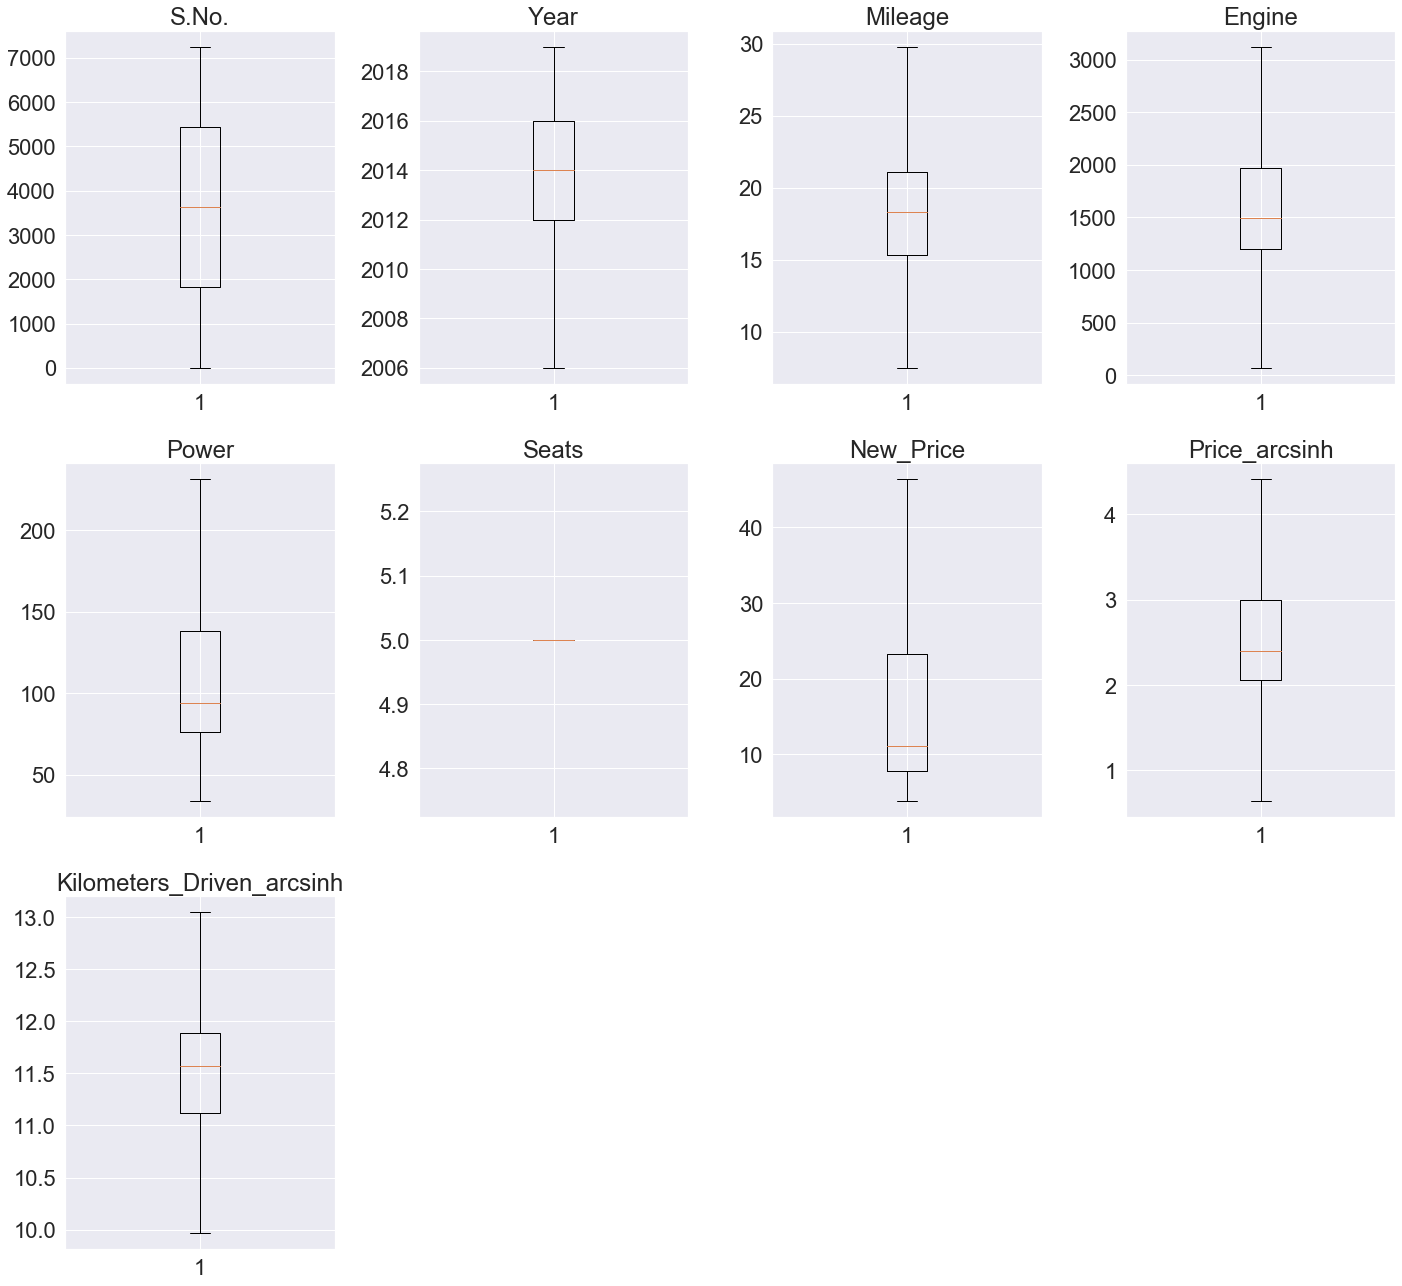

In [177]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(UsedCars_df_A1[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

******** Outliers have been treated **********

## 3.6 Get dummies for Categorical fields

In [178]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
UsedCars_df_A2 = UsedCars_df_A1
UsedCars_df_A2 = pd.get_dummies(UsedCars_df_A2, columns=['Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True)
UsedCars_df_A2.head()

,S.No.,Name,Location,Year,Mileage,Engine,Power,Seats,New_Price,Price_arcsinh,Kilometers_Driven_arcsinh,Brand,Model,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,26.600,998.000,58.160,5.000,7.870,1.326,11.878,Maruti,Wagon R LXI CNG,0,0,0,0,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,19.670,1582.000,126.200,5.000,9.740,3.220,11.314,Hyundai,Creta 1.6 CRDi SX Option,1,0,0,0,1,0,0,0
2,2,Honda Jazz V,Chennai,2011,18.200,1199.000,88.700,5.000,8.610,2.209,11.430,Honda,Jazz V,0,0,0,1,1,0,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,20.770,1248.000,88.760,5.000,7.870,2.492,12.067,Maruti,Ertiga VDI,1,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,15.200,1968.000,140.800,5.000,46.320,3.570,11.306,Audi,A4 New 2.0 TDI Multitronic,1,0,0,0,0,0,1,0


In [179]:
UsedCars_df_A2['Brand'].unique()

[Maruti, Hyundai, Honda, Audi, Nissan, ..., Mini, Fiat, Jeep, Isuzu, Bentley]
Length: 25
Categories (25, object): [Maruti, Hyundai, Honda, Audi, ..., Fiat, Jeep, Isuzu, Bentley]

In [180]:
UsedCars_df_A2['Location'].unique()

[Mumbai, Pune, Chennai, Coimbatore, Hyderabad, ..., Kochi, Kolkata, Delhi, Bangalore, Ahmedabad]
Length: 11
Categories (11, object): [Mumbai, Pune, Chennai, Coimbatore, ..., Kolkata, Delhi, Bangalore, Ahmedabad]

In [181]:
UsedCars_df_A2 = pd.get_dummies(UsedCars_df_A2, columns=['Brand','Location'], drop_first=True)

In [182]:
UsedCars_df_A2.drop(['S.No.','Name','Model'], axis=1,inplace = True)

In [183]:
UsedCars_df_A2

,Year,Mileage,Engine,Power,Seats,New_Price,Price_arcsinh,Kilometers_Driven_arcsinh,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Hindustan,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010,26.600,998.000,58.160,5.000,7.870,1.326,11.878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2015,19.670,1582.000,126.200,5.000,9.740,3.220,11.314,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2011,18.200,1199.000,88.700,5.000,8.610,2.209,11.430,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2012,20.770,1248.000,88.760,5.000,7.870,2.492,12.067,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2013,15.200,1968.000,140.800,5.000,46.320,3.570,11.306,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,2011,20.540,1598.000,103.600,5.000,11.105,2.291,12.094,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
7249,2015,17.210,1197.000,103.600,5.000,11.105,2.291,11.678,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
7250,2012,23.080,1461.000,63.100,5.000,9.510,2.165,10.933,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7251,2013,17.200,1197.000,103.600,5.000,11.105,2.291,11.557,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


#  4. Model Building - Linear Regression

In [184]:
#Defining X and y variables
#Price is dependent variable and other features are independent variables.
#Dropping dependent variable price and have independent variables in X
#have dependent variable Price in Y

X = UsedCars_df_A2.drop(['Price_arcsinh'], axis=1)
y = UsedCars_df_A2[['Price_arcsinh']]

print(X.head())
print(y.head())

   Year  Mileage   Engine   Power  Seats  New_Price  \
0  2010   26.600  998.000  58.160  5.000      7.870   
1  2015   19.670 1582.000 126.200  5.000      9.740   
2  2011   18.200 1199.000  88.700  5.000      8.610   
3  2012   20.770 1248.000  88.760  5.000      7.870   
4  2013   15.200 1968.000 140.800  5.000     46.320   

   Kilometers_Driven_arcsinh  Fuel_Type_Diesel  Fuel_Type_Electric  \
0                     11.878                 0                   0   
1                     11.314                 1                   0   
2                     11.430                 0                   0   
3                     12.067                 1                   0   
4                     11.306                 1                   0   

   Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Manual  \
0              0                 0                    1   
1              0                 0                    1   
2              0                 1                    1   
3           

In [185]:
#To get rows and columns of X and Y 
print(X.shape)
print(y.shape)

(7091, 57)
(7091, 1)


In [186]:
#Include the Sklearn library for Model building
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [187]:
X_train.head()

,Year,Mileage,Engine,Power,Seats,New_Price,Kilometers_Driven_arcsinh,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Hindustan,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
1308,2014,14.210,2987.000,165.000,5.000,46.320,11.097,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6207,2007,18.100,1493.000,110.000,5.000,9.740,11.932,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3012,2016,28.400,1248.000,74.000,5.000,7.270,11.552,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5635,2012,17.000,1497.000,118.000,5.000,11.150,11.339,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2717,2016,18.900,998.000,67.100,5.000,7.870,11.000,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 4.1 Linear Regression model

In [188]:
#Fitting linear model
lin_reg_model = LinearRegression()                                    
lin_reg_model.fit(X_train, y_train)         

#pred = linearregression.predict(X_test)                              

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [189]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_), \
                       index=X_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

                           Coefficients
Year                              0.095
Mileage                          -0.013
Engine                            0.000
Power                             0.006
Seats                            -0.000
New_Price                         0.012
Kilometers_Driven_arcsinh        -0.065
Fuel_Type_Diesel                  0.257
Fuel_Type_Electric                1.112
Fuel_Type_LPG                     0.087
Fuel_Type_Petrol                  0.050
Transmission_Manual              -0.049
Owner_Type_Fourth & Above         0.148
Owner_Type_Second                -0.054
Owner_Type_Third                 -0.184
Brand_Audi                        0.179
Brand_BMW                         0.065
Brand_Bentley                     1.013
Brand_Chevrolet                   0.000
Brand_Datsun                     -0.441
Brand_Fiat                       -0.400
Brand_Force                      -0.000
Brand_Ford                       -0.129
Brand_Hindustan                  -0.000


In [190]:
intercept = lin_reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -189.32731655116294


In [191]:
#in-sample score (R^2)

lin_reg_model.score(X_train, y_train)

0.8841508247831332

In [192]:
#out of sample score (R^2)

lin_reg_model.score(X_test, y_test)

0.8858834809532969

In [193]:
# MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame({
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "MAE": mean_absolute_error(y_act, y_pred),
                "MAPE": mape(y_act, y_pred),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

## 4.2 Model performance

In [194]:
# Checking model performance on train set
print('Training Performance\n')
print(model_perf(lin_reg_model, X_train, y_train))

Training Performance

   RMSE   MAE  MAPE   R^2  Adjusted R^2
0 0.271 0.202 9.254 0.884         0.883


In [195]:
# Checking model performance on test set
print('Test Performance\n')
print(model_perf(lin_reg_model, X_test, y_test))

Test Performance

   RMSE   MAE  MAPE   R^2  Adjusted R^2
0 0.267 0.202 9.105 0.886         0.883


***Observations:***
- The R2 for Training model is 0.884
- The R2 for Testing  model is 0.886
- The Difference between Train and Test R2 is less than 0.03
- R^2 value is 0.886 which means that in this model independent variables are able to explain 88.6% of variances in dependent variable

## 5. Checking the Linear Regression Assumptions


## 5.1 To test for Multicollinearity:
- To compute VIF (Variance  Inflation  factor), we first have to add a constant column having value 1 to our input variables



In [196]:
X1 = X.copy()
X1['const'] = 1
X1.head()

,Year,Mileage,Engine,Power,Seats,New_Price,Kilometers_Driven_arcsinh,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Hindustan,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,const
0,2010,26.600,998.000,58.160,5.000,7.870,11.878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2015,19.670,1582.000,126.200,5.000,9.740,11.314,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,2011,18.200,1199.000,88.700,5.000,8.610,11.430,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,2012,20.770,1248.000,88.760,5.000,7.870,12.067,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,2013,15.200,1968.000,140.800,5.000,46.320,11.306,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Year                         2.239
Mileage                      3.792
Engine                       9.097
Power                        8.526
Seats                        0.000
New_Price                   63.842
Kilometers_Driven_arcsinh    1.947
Fuel_Type_Diesel            30.459
Fuel_Type_Electric           1.049
Fuel_Type_LPG                1.214
Fuel_Type_Petrol            31.185
Transmission_Manual          2.325
Owner_Type_Fourth & Above    1.014
Owner_Type_Second            1.181
Owner_Type_Third             1.095
Brand_Audi                     inf
Brand_BMW                      inf
Brand_Bentley                  inf
Brand_Chevrolet                nan
Brand_Datsun                   inf
Brand_Fiat                     inf
Brand_Force                    nan
Brand_Ford                     inf
Brand_Hindustan                nan
Brand_Honda                    inf
Brand_Hyundai                  inf
Brand_ISUZU                    nan
Brand_Isuzu         

Observations:
- There are few features whose VIF values are greater than 5. We will drop the multicollinear columns and then check the model.

In [198]:
# Method to drop all the multicollinear columns and choose which one we should drop
def treating_multicollinearity(high_vif_columns, x_train, x_test, y_train, y_test):
    """
    Drop every column that has VIF score greater than 5, one by one.
    Look at the adjusted R square of all these models
    Look at the RMSE of all these models on test data
    """
    adj_rsq_scores = []
    rmse_test_data = []

    # build ols models by dropping one of these at a time and observe the Adjusted R-squared
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        # Create the model
        
        model = LinearRegression(fit_intercept=False)
        model.fit(train, y_train)
        # Adj R-Sq
        adj_rsq_scores.append(adj_r2(train, y_train, model.predict(train)))
        # RMSE (Test data)
        y_pred_test_Price = model.predict(test)
        y_test_Price = y_test
        rmse_test_data.append(np.sqrt(mean_squared_error(y_pred_test_Price, y_test_Price)))

    # Add new Adj_Rsq and RMSE after dropping each colmn
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj_rsq_after_dropping_col": adj_rsq_scores,
            "Test RMSE": rmse_test_data,
        }
    ).sort_values(by="Adj_rsq_after_dropping_col", ascending=False)

    print(temp)

In [199]:
high_vif_columns = ["Engine","Power","New_Price","Fuel_Type_Diesel","Fuel_Type_Petrol"]

X_train1 = X_train.copy()
X_train1['constant'] = 1

X_test1 = X_test.copy()
X_test1['constant'] = 1

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                col  Adj_rsq_after_dropping_col  Test RMSE
4  Fuel_Type_Petrol                       0.883      0.267
2         New_Price                       0.882      0.268
3  Fuel_Type_Diesel                       0.882      0.267
0            Engine                       0.882      0.268
1             Power                       0.871      0.280


In [200]:
# Dropping New_Price would have the maximum impact on predictive power of the model (amongst the variables being considered)
# We'll drop Power and check the vif again

X_train2 = X_train1.drop('Power', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Year                         2.253
Mileage                      3.844
Engine                       5.544
Seats                        0.000
New_Price                   66.079
Kilometers_Driven_arcsinh    1.966
Fuel_Type_Diesel            32.168
Fuel_Type_Electric           1.072
Fuel_Type_LPG                1.243
Fuel_Type_Petrol            32.664
Transmission_Manual          2.301
Owner_Type_Fourth & Above    1.012
Owner_Type_Second            1.187
Owner_Type_Third             1.106
Brand_Audi                     inf
Brand_BMW                      inf
Brand_Bentley                  inf
Brand_Chevrolet                nan
Brand_Datsun                   inf
Brand_Fiat                     inf
Brand_Force                    nan
Brand_Ford                     inf
Brand_Hindustan                nan
Brand_Honda                    inf
Brand_Hyundai                  inf
Brand_ISUZU                    nan
Brand_Isuzu                    inf
Brand_Jaguar        

In [201]:
# We'll drop Fuel_Type_Diesel and check the vif again

X_train2 = X_train2.drop('Fuel_Type_Diesel', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Year                         2.253
Mileage                      3.843
Engine                       5.529
Seats                        0.000
New_Price                   66.049
Kilometers_Driven_arcsinh    1.965
Fuel_Type_Electric           1.024
Fuel_Type_LPG                1.026
Fuel_Type_Petrol             2.838
Transmission_Manual          2.301
Owner_Type_Fourth & Above    1.012
Owner_Type_Second            1.187
Owner_Type_Third             1.106
Brand_Audi                     inf
Brand_BMW                      inf
Brand_Bentley                  inf
Brand_Chevrolet                nan
Brand_Datsun                   inf
Brand_Fiat                     inf
Brand_Force                    nan
Brand_Ford                     inf
Brand_Hindustan                nan
Brand_Honda                    inf
Brand_Hyundai                  inf
Brand_ISUZU                    nan
Brand_Isuzu                    inf
Brand_Jaguar                   inf
Brand_Jeep          

In [202]:
# We'll drop New_Price and check the vif again

X_train2 = X_train2.drop('New_Price', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Year                        2.253
Mileage                     3.840
Engine                      5.471
Seats                       0.000
Kilometers_Driven_arcsinh   1.964
Fuel_Type_Electric          1.024
Fuel_Type_LPG               1.026
Fuel_Type_Petrol            2.829
Transmission_Manual         2.276
Owner_Type_Fourth & Above   1.012
Owner_Type_Second           1.187
Owner_Type_Third            1.105
Brand_Audi                    inf
Brand_BMW                     inf
Brand_Bentley                 inf
Brand_Chevrolet               nan
Brand_Datsun                  inf
Brand_Fiat                    inf
Brand_Force                   nan
Brand_Ford                    inf
Brand_Hindustan               nan
Brand_Honda                   inf
Brand_Hyundai                 inf
Brand_ISUZU                   nan
Brand_Isuzu                   inf
Brand_Jaguar                  inf
Brand_Jeep                    inf
Brand_Lamborghini             nan
Brand_Land   

***Observations:***
- VIF has come down to quite a good limit and we can say that there is no multicollinearity.

## 5.2 Mean of residuals should be zero:

In [203]:
lin_reg_model1 = LinearRegression(fit_intercept=False)
lin_reg_model1.fit(X_train2,y_train)

print('Training Performance\n')
print(model_perf(lin_reg_model1, X_train2, y_train))

Training Performance

   RMSE   MAE  MAPE   R^2  Adjusted R^2
0 0.288 0.219 9.946 0.870         0.868


In [204]:
# predicted values
fitted = lin_reg_model1.predict(X_train2)
residual = fitted - y_train.values

np.mean(residual)

8.059381089155535e-12

Mean of redisuals is close to 0.

## 5.3 Test for Linearity of variables:

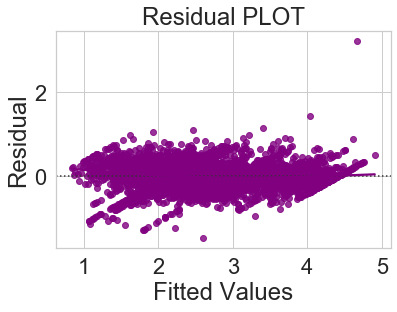

In [205]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.
No pattern in residual plot, hence assumption is satisfied.

## 5.4 Test for Homoscedacity 

As seen before, no pattern is observed in residual plot. Hence, this assumption is satisfied

## 5.5 Normality of Residuals

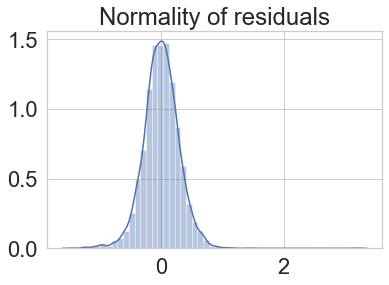

In [206]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

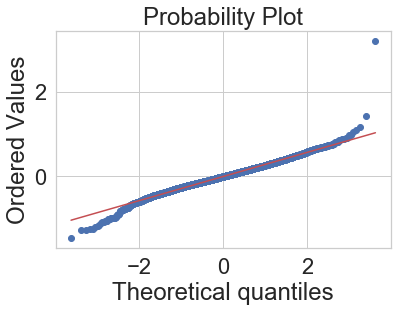

In [207]:
import pylab
import scipy.stats as stats
stats.probplot(residual.flatten(),dist="norm",plot=pylab)
plt.show()

As per QQ plot they are approximately normal. So, this assumption is also satisfied.

# 6. Model performance Evaluation:

## 6.1 Metrics checked - MAE, RMSE, R2

In [208]:
X_train2.columns

Index(['Year', 'Mileage', 'Engine', 'Seats', 'Kilometers_Driven_arcsinh',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Hindustan', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_ISUZU', 'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep',
       'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti',
       'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan',
       'Brand_OpelCorsa', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Smart', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata'

In [209]:
# first we add the constant to test input variables
X_test['constant'] = 1

X_test_final = X_test[X_train2.columns]

In [210]:
X_test_final.head()

,Year,Mileage,Engine,Seats,Kilometers_Driven_arcsinh,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Hindustan,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,constant
2861,2016,18.900,1197.000,5.000,11.721,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3674,2016,15.100,1196.000,5.000,11.344,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
727,2010,18.500,1197.000,5.000,11.816,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
958,2016,19.100,1197.000,5.000,11.475,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7148,2010,15.000,1396.000,5.000,11.513,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [211]:
y_pred = lin_reg_model1.predict(X_test_final)

## 6.2 Checking the performance on train and test

In [212]:
print('Training Performance\n')
print(model_perf(lin_reg_model1, X_train2, y_train))

Training Performance

   RMSE   MAE  MAPE   R^2  Adjusted R^2
0 0.288 0.219 9.946 0.870         0.868


In [213]:
print('Test Performance\n')
print(model_perf(lin_reg_model1, X_test_final, y_test))

Test Performance

   RMSE   MAE  MAPE   R^2  Adjusted R^2
0 0.281 0.215 9.610 0.874         0.871


In [214]:
lin_reg_model1 = LinearRegression(fit_intercept=False)
lin_reg_model1.fit(X_train2,y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(lin_reg_model1.coef_.flatten(), \
                       index=X_train2.columns.tolist(), columns=['Coefficients'])
print(coef_df)

# model performance
print('\n\nTraining Performance\n')
print(model_perf(lin_reg_model1, X_train2, y_train))

                           Coefficients
Year                              0.102
Mileage                          -0.015
Engine                            0.000
Seats                           -38.814
Kilometers_Driven_arcsinh        -0.057
Fuel_Type_Electric                0.845
Fuel_Type_LPG                    -0.179
Fuel_Type_Petrol                 -0.176
Transmission_Manual              -0.117
Owner_Type_Fourth & Above         0.109
Owner_Type_Second                -0.055
Owner_Type_Third                 -0.189
Brand_Audi                        0.239
Brand_BMW                         0.183
Brand_Bentley                     1.061
Brand_Chevrolet                  -0.000
Brand_Datsun                     -1.137
Brand_Fiat                       -0.930
Brand_Force                      -0.000
Brand_Ford                       -0.702
Brand_Hindustan                  -0.000
Brand_Honda                      -0.606
Brand_Hyundai                    -0.639
Brand_ISUZU                       0.000


### Observations - Interpretation of Model coefficients
Now this is our final model which follows all the assumptions and this can be used for interpretations.

- The price of used cars are positively correlated with years, Electric fuel type, Fourth owners and above and on some     
  locations. 
- As manufactured car year is latest, the price of used cars increases.
- For some locations like bangalore,chennai,coimbatore, hyderabad are positively corrected with the used car prices.
- For certain brands of used cars, the prices are positively correlated.
- The price of car are negatively correlated for first and second car owners whereas positively correlated with Fourth owners and above.
- The price of car is decreases slightly as kilometer driven increases.

In [215]:
# model performance on test set
print('Test Performance\n')
print(model_perf(lin_reg_model1, X_test_final, y_test))

Test Performance

   RMSE   MAE  MAPE   R^2  Adjusted R^2
0 0.281 0.215 9.610 0.874         0.871


Both  𝑅2  score and RMSE show that the model fitted is good, has no overfitting and can be used for making predictions.